In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import numpy as np
from nilearn import plotting
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [2]:
# load good stuff
%matplotlib inline
%load_ext oct2py.ipython

In [3]:
# Add niak hcp and psomm to oactve path
%octave addpath(genpath('~/git/Misc'));
%octave build_path zooniverse_qc psom

Adding library zooniverse_qc to the search path.

Adding library psom to the search path.

In [4]:
# Set path
#path_root = '/home/yassinebha/Drive/QC_zooniverse/'
path_root = '/media/yassine/data_disk/Drive/QC_zooniverse_2/'
path_outline = os.path.join(path_root ,'template_layout/brain_outline_bold/')
path_layout = os.path.join(path_root ,'template_layout/layout/')
%octave_push  path_root path_outline path_layout

## Workflow images

### Apply annotation to every image

In [15]:
# cobre
path_images= '/media/yassine/data_disk/data/zooqc/zooqc_report_cobre_08-Mar-2018/registration'
path_out = '/media/yassine/data_disk/data/zooqc/zooqc_report_cobre_08-Mar-2018/registration_annotated'

In [13]:
# adhd
path_images= os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
path_out = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration_annotated')

In [16]:
image_patern = '{}_anat.png'
list_ids = [f[:9]  for f in os.listdir(path_images)]
list_ids_clean = np.unique(list_ids)
list_images = [image_patern.format(ii) for ii in list_ids_clean]

In [21]:
for file_name in list_images:
    # get individual image
    base = Image.open(os.path.join(path_images,file_name)).convert('RGBA')
    # make a new blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))
    # get a font and special characters
    fnt_up = ImageFont.truetype(os.path.join(path_root,'font/OpenSans-Semibold.ttf'), 20)
    fnt_down = ImageFont.truetype(os.path.join(path_root,"font/OpenSans-Semibold.ttf"), 20)
    fnt_icon_p = ImageFont.truetype(os.path.join(path_root,"font/Guifx_v2_Transports.ttf"), 27) # play
    icon_p =u"\25d" #play icon
    # get a drawing context
    d = ImageDraw.Draw(txt)
    # draw text, and specify opacity
    d.text((295,7),"Individual",font=fnt_up,fill=(255,255,255,255))
    d.text((10,672), "Click      to flip between target and individual image", font=fnt_down, fill=(255,255,255,255))
    d.text((52,675), icon_p, font=fnt_icon_p, fill=(255,255,255,255))#play icon
    # aplay text to image
    out = Image.alpha_composite(base, txt)
    out.save( os.path.join(path_out,file_name))
    base.close()

### Add annotation to anat template image

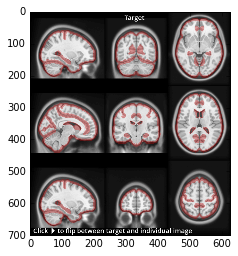

In [26]:
# get an image
base = Image.open('/media/yassine/data_disk/data/zooqc/zooqc_report_cobre_08-Mar-2018/group/anat_template_stereotaxic.png').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt_up = ImageFont.truetype(os.path.join(path_root,'font/OpenSans-Semibold.ttf'), 20)
fnt_down = ImageFont.truetype(os.path.join(path_root,"font/OpenSans-Semibold.ttf"), 20)
fnt_icon_p = ImageFont.truetype(os.path.join(path_root,"font/Guifx_v2_Transports.ttf"), 27) # play
icon_p =u"\25d" #play icon

# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((295,7),"Target",font=fnt_up,fill=(255,255,255,255))
d.text((10,672), "Click      to flip between target and individual image", font=fnt_down, fill=(255,255,255,255))
d.text((52,675), icon_p, font=fnt_icon_p, fill=(255,255,255,255))#play icon

# applay text to image
out = Image.alpha_composite(base, txt)
plt.imshow(out)
out.save('/media/yassine/data_disk/data/zooqc/zooqc_report_cobre_08-Mar-2018/registration_annotated/anat_template_stereotaxic_tutorial.png')
base.close()

## Training images

#### Add anotation to template image

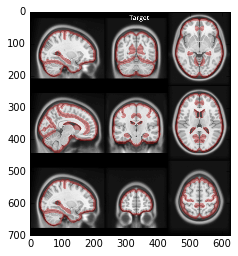

In [15]:
# get an image
base = Image.open('/media/yassine/data_disk/data/zooqc/zooqc_report_cobre_08-Mar-2018/group/anat_template_stereotaxic.png').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt_up = ImageFont.truetype("font/OpenSans-Bold.ttf", 28)
fnt_mid = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
fnt_down = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
fnt_icon_i = ImageFont.truetype("font/Esoterik.ttf", 25) # information
fnt_icon_p = ImageFont.truetype("font/Guifx_v2_Transports.ttf", 27) # play
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
#d.text((5,-5), "ANSWER :", font=fnt_up, fill=(255,255,255,255))
#d.text((5,-5), "TRAINING", font=fnt_up, fill=(255,255,255,255))
d.text((310,7),"Target",font=fnt_mid,fill=(255,255,255,255))
#d.text((218,672), "Click here    to see the answer", font=fnt_down, fill=(255,255,255,255))
#d.text((10,672), "Click      to flip between target and individual image", font=fnt_down, fill=(255,255,255,255))
#d.text((279,672), "Click       button for explanation", font=fnt_down, fill=(255,255,255,255))
icon_i = u"\U0001F6C8" #information icon
icon_p =u"\25d" #play icon
#d.text((52,675), icon_p, font=fnt_icon_p, fill=(255,255,255,255))#play icon
#d.text((332,677), icon_i, font=fnt_icon_i, fill=(255,255,255,255))# information icon
#d.line(((600,665),(600,692),(599,692),(605,680),(600,692),(595,680)), fill=(0,255,0,150),width=3)#information icon
#d.line(((323,665),(323,692),(322,692),(328,680),(323,692),(318,680)), fill=(0,255,0,150),width=3)#switch arrow
out = Image.alpha_composite(base, txt)
plt.imshow(out)
out.show()
out.save(os.path.join(path_root,'tutorial_v2/anat_ok/anat_template_stereotaxic_tutorial_v2.png'))
base.close()

#### Add annotation to all Training images

In [7]:
# Train images: no answer
path_images= os.path.join(path_root,'tutorial_v2/training/raw_images')
path_out = os.path.join(path_root,'tutorial_v2/training/train_images')
#path_out = os.path.join(path_root,'tutorial_v2/training/answer_images')

list_images = os.listdir(path_images)
for file_name in list_images:
    # get an image
    base = Image.open(os.path.join(path_images,file_name)).convert('RGBA')
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))
    
    # get a font
    fnt_up = ImageFont.truetype("font/OpenSans-Bold.ttf", 28)
    fnt_mid = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    fnt_down = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    fnt_icon_i = ImageFont.truetype("font/Esoterik.ttf", 25) # information
    fnt_icon_p = ImageFont.truetype("font/Guifx_v2_Transports.ttf", 27) # play
    # get a drawing context
    d = ImageDraw.Draw(txt)
    
    # draw text, half opacity
    #d.text((5,-5), "ANSWER :", font=fnt_up, fill=(255,255,255,255))
    d.text((5,-5), "TRAINING", font=fnt_up, fill=(255,255,255,255))
    #d.text((310,7),"Target",font=fnt_mid,fill=(255,255,255,255))
    d.text((295,7),"Individual",font=fnt_mid,fill=(255,255,255,255))
    d.text((218,672), "Click here    to see the answer", font=fnt_down, fill=(255,255,255,255))
    #d.text((10,672), "Click      to flip between target and individual images", font=fnt_down, fill=(255,255,255,255))
    #d.text((279,672), "Click       button for explanation", font=fnt_down, fill=(255,255,255,255))
    icon_i = u"\U0001F6C8" #information icon
    icon_p =u"\25d" #play icon
    #d.text((52,675), icon_p, font=fnt_icon_p, fill=(255,255,255,255))
    #d.text((332,677), icon_i, font=fnt_icon_i, fill=(255,255,255,255))
    #d.line(((600,665),(600,692),(599,692),(605,680),(600,692),(595,680)), fill=(0,255,0,150),width=3)#information icon
    d.line(((323,665),(323,692),(322,692),(328,680),(323,692),(318,680)), fill=(0,255,0,150),width=3)#switch arrow
    out = Image.alpha_composite(base, txt)
    out.show()
    out.save(os.path.join(path_out,file_name))
    base.close()

In [6]:
# Train imagesl: with answer
path_images= os.path.join(path_root,'tutorial_v2/training/raw_images')
path_out = os.path.join(path_root,'tutorial_v2/training/answer_images')
list_images = os.listdir(path_images)
for file_name in list_images:
    # get an image
    base = Image.open(os.path.join(path_images,file_name)).convert('RGBA')
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))
    
    # get a font
    fnt_up = ImageFont.truetype("font/OpenSans-Bold.ttf", 28)
    fnt_mid = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    fnt_down = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    fnt_icon_i = ImageFont.truetype("font/Esoterik.ttf", 25) # information
    fnt_icon_p = ImageFont.truetype("font/Guifx_v2_Transports.ttf", 27) # play
    # get a drawing context
    d = ImageDraw.Draw(txt)
    
    # draw text, half opacity
    d.text((5,-5), "ANSWER :", font=fnt_up, fill=(255,255,255,255))
    d.text((295,7),"Individual",font=fnt_mid,fill=(255,255,255,255))
    d.text((279,672), "Click       button for explanation", font=fnt_down, fill=(255,255,255,255))
    icon_i = u"\U0001F6C8" #information icon
    d.text((332,677), icon_i, font=fnt_icon_i, fill=(255,255,255,255))
    d.line(((600,665),(600,692),(599,692),(605,680),(600,692),(595,680)), fill=(0,255,0,150),width=3)#information icon
    out = Image.alpha_composite(base, txt)
    out.show()
    out.save(os.path.join(path_out,file_name))
    base.close()

#### Generate gif training

In [8]:
path_images= os.path.join(path_root,'tutorial_v2/training/train_images')
path_out = os.path.join(path_root,'tutorial_v2/training/train_gif_images')

In [9]:
list_images = os.listdir(path_images)
for file_name in list_images:
    # generate gif with image magic
    file_ind = os.path.join(path_images,file_name)
    file_target = os.path.join(path_root,"tutorial_v2/training/anat_template_stereotaxic_training.png")
    (fileBaseName, fileExtension)=os.path.splitext(file_name)
    file_out = os.path.join(path_out,"{}.gif".format(fileBaseName))
    command = "convert -delay 100 " +  file_ind  + ' ' + file_target +  ' ' + file_out
    os.system(command)

#### Generate gif answer

In [10]:
path_images= os.path.join(path_root,'tutorial_v2/training/answer_images')
path_out = os.path.join(path_root,'tutorial_v2/training/answer_gif_images')

In [11]:
list_images = os.listdir(path_images)
for file_name in list_images:
    # generate gif with image magic
    file_ind = os.path.join(path_images,file_name)
    file_target = os.path.join(path_root,"tutorial_v2/training/anat_template_stereotaxic_answer.png")
    (fileBaseName, fileExtension)=os.path.splitext(file_name)
    file_out = os.path.join(path_out,"{}.gif".format(fileBaseName))
    command = "convert -delay 100 " +  file_ind  + ' ' + file_target +  ' ' + file_out
    os.system(command)

#### build manifest file 

In [12]:
from collections import OrderedDict
path_train = os.path.join(path_root,'tutorial_v2/training/train_gif_images')
list_train = os.listdir(path_train)
list_ID = [ii[:9] for ii in list_train]
list_answer = ["{}_answer.gif".format(ii[10:-4]) for ii in list_train]
data = {'Subject_ID':list_ID,'Image1':list_train,'Image2':list_answer}
manifest_df = pd.DataFrame(data)
manifest_df.to_csv(os.path.join(path_root,'tutorial_v2/training/manifest_training.csv'),index = False,columns=['Subject_ID','Image1','Image2'])
manifest_df

,Image1,Image2,Subject_ID
0,X_1038415_anat_fail4.gif,anat_fail4_answer.gif,X_1038415
1,HC0040027_anat_ok2.gif,anat_ok2_answer.gif,HC0040027
2,X_4104523_anat_maybe5.gif,anat_maybe5_answer.gif,X_4104523
3,X_0010009_anat_maybe3.gif,anat_maybe3_answer.gif,X_0010009
4,X_8415034_anat_fail2.gif,anat_fail2_answer.gif,X_8415034
5,X_0010031_anat_maybe6.gif,anat_maybe6_answer.gif,X_0010031
6,HC0040043_anat_ok4.gif,anat_ok4_answer.gif,HC0040043
7,X_2907383_anat_maybe4.gif,anat_maybe4_answer.gif,X_2907383
8,HC0040024_anat_ok1.gif,anat_ok1_answer.gif,HC0040024
9,X_0010013_anat_fail3.gif,anat_fail3_answer.gif,X_0010013


## tutorial images 

In [5]:
# path ok
path_images= os.path.join(path_root,'tutorial_v2/anat_ok/raw_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_ok/annotated_images')

In [59]:
# path Maybe
path_images= os.path.join(path_root,'tutorial_v2/anat_maybe/raw_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_maybe/annotated_images')

In [62]:
# path fail
path_images= os.path.join(path_root,'tutorial_v2/anat_fail/raw_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_fail/annotated_images')

In [7]:
image_patern = '{}_anat.png'
list_ids = [f[:9]  for f in os.listdir(path_images)]
list_ids_clean = np.unique(list_ids)
list_images = [image_patern.format(ii) for ii in list_ids_clean]

In [8]:
list_images

['HC0040024_anat.png', 'HC0040043_anat.png']

In [19]:
for file_name in list_images:
    # get individual image
    base = Image.open(os.path.join(path_images,file_name)).convert('RGBA')
    # make a new blank image for the text, initialized to transparent text color
    txt = Image.new('RGBA', base.size, (255,255,255,0))
    # get a font and special characters
    fnt_mid = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    fnt_up = ImageFont.truetype("font/OpenSans-Bold.ttf", 23)
    #fnt_down = ImageFont.truetype("font/OpenSans-Semibold.ttf", 20)
    #icon_p =u"\25d" #play icon
    # get a drawing context
    d = ImageDraw.Draw(txt)
    # draw text, and specify opacity
    d.text((5,-5), "OK", font=fnt_up, fill=(0,255,0,255))# OK green
    #d.text((5,-5), "Maybe", font=fnt_up, fill=(255,165,0,255))# Maybe orange
    #d.text((5,-5), "Fail", font=fnt_up, fill=(255,0,0,255))# Fail red
    d.text((295,7),"Individual",font=fnt_mid,fill=(255,255,255,255))
    #d.text((10,672), "Click      to flip between target and individual image", font=fnt_down, fill=(255,255,255,255))
    #d.text((52,675), icon_p, font=fnt_icon_p, fill=(255,255,255,255))#play icon
    # aplay text to image
    out = Image.alpha_composite(base, txt)
    out.save( os.path.join(path_out,file_name))
    out.show()
    base.close()

#### Generate gif for ok

In [20]:
path_images= os.path.join(path_root,'tutorial_v2/anat_ok/annotated_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_ok/gif_images')
list_images = os.listdir(path_images)
for file_name in list_images:
    # generate gif with image magic
    file_ind = os.path.join(path_images,file_name)
    file_target = os.path.join(path_root,"tutorial_v2/anat_ok/anat_template_stereotaxic_tutorial_v2.png")
    (fileBaseName, fileExtension)=os.path.splitext(file_name)
    file_out = os.path.join(path_out,"{}.gif".format(fileBaseName))
    command = "convert -delay 100 " +  file_ind  + ' ' + file_target +  ' ' + file_out
    os.system(command)

#### Generate gif for fail

In [17]:
path_images= os.path.join(path_root,'tutorial_v2/anat_fail/annotated_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_fail/gif_images')
list_images = os.listdir(path_images)
for file_name in list_images:
    # generate gif with image magic
    file_ind = os.path.join(path_images,file_name)
    file_target = os.path.join(path_root,"tutorial_v2/anat_fail/anat_template_stereotaxic_tutorial_v2.png")
    (fileBaseName, fileExtension)=os.path.splitext(file_name)
    file_out = os.path.join(path_out,"{}.gif".format(fileBaseName))
    command = "convert -delay 100 " +  file_ind  + ' ' + file_target +  ' ' + file_out
    os.system(command)

#### Generate gif for maybe

In [67]:
path_images= os.path.join(path_root,'tutorial_v2/anat_maybe/annotated_images')
path_out = os.path.join(path_root,'tutorial_v2/anat_maybe/gif_images')
list_images = os.listdir(path_images)
for file_name in list_images:
    # generate gif with image magic
    file_ind = os.path.join(path_images,file_name)
    file_target = os.path.join(path_root,"tutorial_v2/anat_maybe/anat_template_stereotaxic_tutorial.png")
    (fileBaseName, fileExtension)=os.path.splitext(file_name)
    file_out = os.path.join(path_out,"{}.gif".format(fileBaseName))
    command = "convert -delay 100 " +  file_ind  + ' ' + file_target +  ' ' + file_out
    os.system(command)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
# get an image
base = Image.open(os.path.join(path_root,'zooqc_cobre_01-Mar-2017/group/HC0040013_anat.png')).convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt_up = ImageFont.truetype("font/OpenSans-Bold.ttf", 35)
fnt_mid = ImageFont.truetype("font/OpenSans-Semibold.ttf", 16)
fnt_down = ImageFont.truetype("font/OpenSans-Bold.ttf", 20)
# get a drawing context
d = ImageDraw.Draw(txt)

# draw text, half opacity
d.text((5,-5), "TRAINING", font=fnt_up, fill=(255,255,255,255))
#d.text((310,7),"Target",font=fnt_mid,fill=(255,255,255,255))
d.text((230,672), "Clic here    to see the answer", font=fnt_down, fill=(255,255,255,255))
d.line(((325,665),(325,692),(324.9,692),(330,680),(325,692),(320,680)), fill=(0,255,0,150),width=3)

out = Image.alpha_composite(base, txt)
plt.imshow(out)
out.show()
out.save(os.path.join(path_root,'zooqc_cobre_01-Mar-2017/group/HC0040013_anat_training.png'))
base.close()

## run pipeline

In [ ]:
#run on pin cobree
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc

path_fmri_preproc ='/data/cisl/yassinebha/zooqc/cobre_fmri_preprocess_nii_20160920/';
in = zoo_grab_report_preprocess(path_fmri_preproc);
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.0001;
opt.invert_contrast.perc_max = 0.9999;
opt.coord_anat =[-30 , -65 , -6 ;
                 -8 , -20 ,  13 ;
                 30 ,  54 ,  58];
             
opt.coord_func =[-30 , -57 , 5 ;
                 -8 , -20 ,  19 ;
                 30 ,  45 ,  58];
opt.folder_out =['/data/cisl/yassinebha/zooqc/cobre_fmri_preprocess_nii_20160920/zooqc_report_cobre_' date];
pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
#run on pin adhd
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc
path_fmri_preproc ='/data/cisl/yassinebha/zooqc/cobre_fmri_preprocess_nii_20160920/';
in = zoo_grab_report_preprocess(path_fmri_preproc);
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

in.group.mask_func_group = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_group_stereonl.nii.gz'];
in.group.avg_mask_func = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_average_stereonl.nii.gz'];
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.1;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out =['/gs/project/gsf-624-aa/projects/zooniverse_qc/zooqc_report_adhd_' date];

pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
#run on guillimin cobree
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc

path_fmri_preproc ='/home/yassinebha/database/cobre_fmri_preprocess_nii_20160920/';
in = zoo_grab_report_preprocess(path_fmri_preproc);
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.0001;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out =['/gs/project/gsf-624-aa/projects/zooniverse_qc/zooqc_report_cobre_' date];
pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
#run on guillimin adhd
clear all
addpath(genpath('/home/yassinebha/git/Misc'))
build_path zooniverse_qc
path_fmri_preproc ='/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess_old/';
files_in  = niak_grab_qc_fmri_preprocess(path_fmri_preproc);
in.ind.anat = files_in.anat;
in.ind.func = files_in.func;
in.group.mask_func_group = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_group_stereonl.nii.gz'];
in.group.avg_mask_func = ['/gs/project/gsf-624-aa/preprocess/adhd200/niak/fmri_preprocess/mask/func_mask_average_stereonl.nii.gz'];
in.template.anat_outline = '/home/yassinebha/layout_anat.nii.gz';
in.template.func_outline = '/home/yassinebha/layout_func.nii.gz';

opt.invert_contrast.perc_min = 0.1;
opt.invert_contrast.perc_max = 0.9999;
opt.folder_out =['/gs/project/gsf-624-aa/projects/zooniverse_qc/zooqc_report_adhd_' date];

pipeline = zoo_report_fmri_preprocess(in,opt);

In [ ]:
# search best coordinate or anat an func montage 
#coord_old =[-30 , -65 , -6 ;
#             -8 , -25 ,  10 ;
#             30 ,  45 ,  60];          
             
coord_anat =[-50 , -65 , -6 ;
             -8 , -20 ,  13 ;
             30 ,  54 ,  58];
             
coord_func =[-50 , -57 , 5 ;
             -8 , -20 ,  19 ;
             30 ,  45 ,  58];